In [1]:
from input import *

calc = True

# Vorgespannter Träger

Die folgende Versuchsnachrechnung zeigt die Möglichkeiten des Modells im Bezug mit einer Vorspannung. 

## Versuchsbeschrieb
In diesem Kapitel wird der vorgespannte Träger T6 nach dem Versuchsbericht @sigrist_versuche_1993 mit dem Drehfedermodell nachgerechnet. Es handelt sich um einen einfachen Balken mit einer Auskragung. Die Geometrie des Versuchs in Längsrichtung ist in @fig-geometrie_t6 gezeigt. 

![Geometrie des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_laengs.svg){#fig-geometrie_t6}

Der dazugehörige Querschnitt ist in @fig-geometrie_qs_t6 gezeigt.

![Geometrie des Querschnitts des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_qs.svg){#fig-geometrie_qs_t6}

Die Lastsituation zeigt die @fig-last_t6. Am Ende des Kragarms greift eine Einzellast $P$ an. Mit $Q$ wird eine Streckenlast simuliert. Der Träger ist an den Punkten $A$ und $B$ einfach gelagert.

![Lagerung und Laststellung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_last_laengs.svg){#fig-last_t6}

Die verlegte schlaffe Bewehrung in Längsrichtung ist in der @fig-bewehrung_laengs_t6 gezeigt.

![Bewehrungslayout in Längsrichtung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_laengs.svg){#fig-bewehrung_laengs_t6}

Das Bewehrungslayout im Querschnitt zeigt die @fig-bewehrung_qs_t6.

![Bewehrungslayout im Querschnitt des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_qs.svg){#fig-bewehrung_qs_t6}

Die Führung der Vorspannung ist in der @fig-vorspannung_t6 gezeigt.

![Vorspannungslayout des Versuchsträgers T6. Horizontaler Abstand [m] und vertikale Position [mm], gemessen von der Unterkante des Trägers, entnommen aus @sigrist_versuche_1993](../imgs/T6_vorspannung_laengs.svg){#fig-vorspannung_t6}






## Parameter

In diesem Abschnitt werden die allgemein verwendeten Parameter aufgelistet. Gegliedert nach den einzelnen Aspekten des Versuchs.

### Vorspannung

Die Parameter der Vorspannung sind die Folgenden. Es ist die Initiale Vorspannkraft, sowie die entsprechenden Querschnittseigenschaften aufgezeigt:

In [2]:
%%render params 
f_py = (1706 *N/mm**2) 
f_pt = (1855*N/mm**2)
V_om = (730*kN)
A_p = 596*mm**2
E_p = 190000*N/mm**2
epsilon_pu = 1.50*percent

eta = 0.9 #Verlustfaktor


<IPython.core.display.Latex object>

Der Verlustfaktor wird ohne Berücksichtigung von Langzeiteffekten auf 90% geschätzt. Daras resultiert die Vorspannkraft zu:

In [3]:
%%render symbolic

P_infty = eta * V_om


<IPython.core.display.Latex object>

In [4]:

%%render params

P_infty


<IPython.core.display.Latex object>

Die Spannung im Spannstahl:

In [5]:
%%render symbolic

sigma_P_infty = P_infty / A_p


<IPython.core.display.Latex object>

In [6]:
%%render params

sigma_P_infty = sigma_P_infty.to(N/mm**2)


<IPython.core.display.Latex object>

/var/folders/6v/tynjq1yn7y3bk7pgzzw8btj00000gn/T/ipykernel_38778/3544568021.py:2: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  epsilon_p = np.array([0, f_py / E_p, epsilon_pu])
/Users/pascalgitz/miniconda3/envs/engineering/lib/python3.11/site-packages/matplotlib/cbook.py:1072: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asanyarray(x)


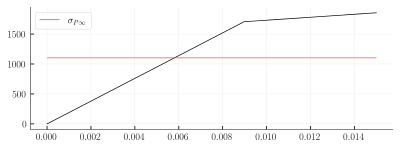

In [7]:
sigma_p = np.array([0, f_py.magnitude, f_pt.magnitude])
epsilon_p = np.array([0, f_py / E_p, epsilon_pu])

plt.plot(epsilon_p, sigma_p, color='black')
plt.hlines(sigma_P_infty.magnitude, 0, epsilon_pu, label='$\sigma_{P\infty}$')
plt.legend()
plt.show()

### Beton

Die Parameter sind Mittelwerte aus Betonwürfel- und Betonzylinderproben.

In [8]:
%%render params 2

f_c = 52.1 *N/mm**2
f_cts = 4.3 *N/mm**2
E_c = 50200 *N/mm**2
rho_c = 2409 *kg/m**3
epsilon_cu = (1.63/1000*los).to(percent)

<IPython.core.display.Latex object>

Das Spannungs-Dehnungs-Verhalten des Betons ist in der @fig-sigma_epc_t6 dargestellt. Definiert ist das Verhalten im positiven Spannungsbereich bis zum Erreichen der Betonzugfestigkeit $f_{cts}$. Das Verhalten im negativen Spannungsbereich wird mit einem linear-elastischem ideal-plastischem Verhalten approximiert.

### Betonstahl

Mittelwerte der Zugproben.

In [9]:
%%render params 

Diam_1 = 10*mm
Diam_2 = 12*mm
Diam_3 = 14*mm

f_sy = 500*(MPa)
f_st = 630*(MPa)
epsilon_sv = (24/1000*los).to(percent)
E_s = 205000*N/mm**2

<IPython.core.display.Latex object>

Die entsprechende Spannungs-Dehnungs-Beziehung ist in @fig-sigma_eps_t6 gezeigt. Als Annahme gilt, dass die Stäbe lediglich unter Zug belastet werden. Die Druckbewehrung wird bei der Bestimmung der Momenten-Krümmungs-Beziehung vernachlässigt. Das Verhalten wird mit einem Bilinearem Verhalten approximiert.

### Geometrie

#### Querschnitt

Die Parameter der Geometrie des Querschnitts beziehen sich auf die @fig-geometrie_qs_t6.

In [10]:
expr_1 = sp.sympify("800*140*140/2 +30*290/2 *(140+10)*2  +30*220*155 + 400*220 *(170+200) +50*90/2 *(2/3*50+570) + 220*50*(570+25)+180*400*710")
expr_2 = sp.sympify("800*140+220*30+30*290+400*220+50*90+50*220+400*180")



In [11]:
%%render params

h_1 = 180*mm
h_2 = 50*mm
h_3 = 400*mm
h_4 = 30*mm
h_5 = 140*mm
h_tot = h_1 + h_2 + h_3 + h_4 + h_5

b_1_inf = 90*mm
b_2_inf = 220*mm
b_3_inf = 90*mm

b_tot_inf = b_1_inf + b_2_inf + b_3_inf
b_tot_sup = 800*mm

S_z =h_tot - (expr_1 /expr_2).evalf(5)*mm

<IPython.core.display.Latex object>

Schwerpunkt des Querschnitts von der Unterkante aus gemessen:

#### Längsrichtung

Der Abschluss des Querschnitts wird nicht mehr weiter verfolgt. Vereinfacht wird der I-Querschnitt als konstant über die Länge betrachtet.

Die beschriebenen Abmessungen $L_n$ sind jeweils vom Stabanfang gemessen.

In [12]:
%%render params

L_1 = 3500*mm
L_2 = 9600*mm

L_tot = L_1 + L_2

<IPython.core.display.Latex object>

#### Lasten

In [13]:
%%render params

L_P = (500*mm).to(m)
L_q = 3.5*m + 300*mm
l_q = 15 *0.6*m #Streckenlast



<IPython.core.display.Latex object>

## Modellierung

### Lastfälle

#### Versuch

Der Versuch wird in den folgenden Laststufen belastet.

#### Vorspannung

In [14]:
c1, c2, c3, c4, c5 =sp.symbols("c1:6")
x =sp.symbols('x')

In [15]:
# | label: fig-z_p_von_x
# | fig-cap: "Geometrie des Spannkabels als Funktion $z_p(x)$"


def lin_expr(ics1, ics2, x1, x2):
    z_1_expr = c1 + c2*x
    z_1_ics1 =sp.Eq(ics1, z_1_expr.subs(x, x1))
    z_1_ics2 =sp.Eq(ics2, z_1_expr.subs(x, x2))
    z_1_expr =z_1_expr.subs(sp.solve([z_1_ics1, z_1_ics2], [c1, c2], dict=True)[0])
    return z_1_expr

def parabel_expr(ics1, ics2, ics3, x1, x2,x3):
    expr = c1 *x**2 +c2*x +c3
    z_ics1 =sp.Eq(ics1, expr.subs(x, x1))
    z_ics2 =sp.Eq(ics2, expr.subs(x, x2))
    z_ics3 =sp.Eq(ics3, expr.subs(x, x3))
    z_expr =expr.subs(sp.solve([z_ics1, z_ics2, z_ics3], [c1, c2, c3], dict=True)[0])
    return z_expr


z_1_analytical =lin_expr(404, 684, 0, 2500)
z_2_analytical = parabel_expr(684, 740, 620, 2500, 3500, 4500)
z_3_analytical =parabel_expr(620, 60, 373, 4500, 9200, 12600)
z_4_analytical = lin_expr(373, 525, 12600, 13600)

z_p_analytical = sp.Piecewise((z_1_analytical, x <= 2500),
                              (z_2_analytical, x < 4500),
                              (z_3_analytical, x <= 12600),
                              (z_4_analytical, x <= 13600))
z_p_analytical_diff =z_p_analytical.diff(x,1)
z_p_analytical_diff2 = z_p_analytical.diff(x,2)

z_p_lambd = sp.lambdify(x, z_p_analytical, 'numpy')
z_p1_lambd = sp.lambdify(x, z_p_analytical_diff,'numpy')
z_p2_lambd = sp.lambdify(x, z_p_analytical_diff2, 'numpy')

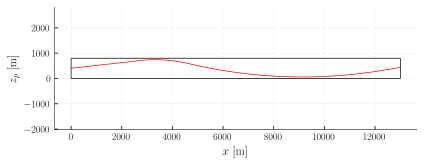

In [16]:

x_element = np.arange(0,L_tot.to(mm).magnitude, (10*cm).to(mm).magnitude)
z_p_element = z_p_lambd(x_element)

plt.plot(x_element, z_p_element, color='red')
plt.axis('equal')

plt.hlines(800,0,max(x_element), color = 'black')
plt.hlines(0,0,max(x_element), color = 'black')

plt.vlines(0,0,800, color='black')
plt.vlines(max(x_element),0,800, color='black')

plt.xlabel('$x$ [m]')
plt.ylabel('$z_p$ [m]')
plt.show()



$$
u_p(x) \simeq z_p(x)'' \cdot P
$$

Dies führt zu den Umlenkkräften:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


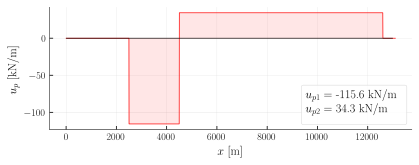

In [17]:
# | label: fig-u_p_von_x
# | fig-cap: "Umlenkkräfte ermittelt mit $z_p(x)''$"

x_plot = np.arange(0,L_tot.to(mm).magnitude, (1*mm).to(mm).magnitude)


dzp_dx = z_p1_lambd(x_plot)
dzp2_dx = z_p2_lambd(x_plot)

plt.plot(x_plot, dzp2_dx*1000*P_infty.to(kN).magnitude, color='red')
plt.fill_between(x_plot, dzp2_dx*1000*P_infty.to(kN).magnitude, alpha=0.1, color='red')

plt.hlines(0,0,max(x_element), color = 'black')

plt.legend(title=f'$u_{{p1}}$ = {round(min(dzp2_dx*1000*P_infty/m),1)}\n $u_{{p2}}$ = {round(max(dzp2_dx*1000*P_infty/m),1)}')

plt.xlabel('$x$ [m]')
plt.ylabel('$u_p$ [kN/m]')
plt.show()

Zusätzlich zu den Umlenkkräften ist bei der Spannstelle eine Druckkraft in Richtung des Spannkabels einzuführen, sowie ein Versatz Moment, durch die Exzentrizität des Spannkabels zum Trägerschwerpunkt.

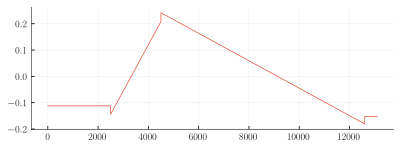

In [18]:
exz_x = S_z.magnitude-z_p_analytical
dexz_dx =exz_x.diff(x)

exz_x_lambd =sp.lambdify(x, exz_x)
dexz_dx_lambd =sp.lambdify(x, dexz_dx)

exz_x_plot =exz_x_lambd(x_plot)
dexz_dx_plot = dexz_dx_lambd(x_plot)

# plt.plot(x_plot, exz_x_plot)
plt.plot(x_plot, dexz_dx_plot)
plt.show()

## Momenten-Krümmungs-Beziehung

Die Momenten-Krümmungs-Beziehung zeigt bei diesem Versuch eine gewisse Komplexität. Grundsätzlich gilt es für jede Abstufung der Bewehrung eine separate Momenten-Krümmungs-Beziehung herzuleiten. 

Wird bei der Vorspannung Spannkraftverluste berücksichtigt, so wirkt der Restquerschnitt des Spannstahls als schlaffe Bewehrung bei Belastung mit. Dies hat Einfluss auf das Momenten-Krümmungs-Verhalten. Durch die parabolische Geometrie des Spannkabels, gilt es die Momenten-Krümmungs-Beziehung unter Variation der Spannkabellage zu definieren, was die Komplexität der Momenten-Krümmungs-Beziehung erhöht.

Um den Rechenaufwand gering zu halten wird lediglich ein qualitatives Verhalten der Momenten-Krümmungs-Beziehung angestrebt. Dabei wird der Querschnitt beim Fliessen der Zugbewehrung betrachtet, sowie wird der Biegewiderstand bestimmt. Diese Punkte werden linear mit einander verbunden. Des Weiteren wird die Druckbewehrung stehts vernachlässigt.



![Querschnittsanalyse mit Fliessen der Zugbewehrung und elastischer Betondruckzone, qualitativer Verlauf](../imgs/QS_14_analyse_4.svg){#fig-qs_fliessen_qualitativ}

![Querschnittsanalyse mit erreichter Zugfestigkeit in der Bewehrung und vollständig plastifizierter Betondruckzone, qualitativer Verlauf](../imgs/QS_14_analyse_5.svg){#fig-qs_widerstand_qualitativ}

### Abschätzung

In [19]:
%%render symbolic

A_s_1 = (4*(14*mm)**2 /4 + 12 *(12*mm)**2 /4)*pi


<IPython.core.display.Latex object>

In [20]:
%%render params
A_s_1

<IPython.core.display.Latex object>

In [21]:
%%render symbolic

d_approx = 750*mm
z_approx = 0.9 * d_approx




<IPython.core.display.Latex object>

In [22]:
%%render params
z_approx

<IPython.core.display.Latex object>

In [36]:
%%render symbolic

x_approx = (A_s_1 *f_sy + A_p * (f_py-sigma_P_infty)) / (b_tot_inf*0.85*f_c)



<IPython.core.display.Latex object>

In [37]:
%%render params
x_approx =x_approx.to(mm)

<IPython.core.display.Latex object>

In [39]:
%%render symbolic
M_R_approx = z_approx * (A_s_1 * f_sy +A_p * (f_py - sigma_P_infty))

<IPython.core.display.Latex object>

In [41]:
%%render params
M_R_approx = M_R_approx.to(kN*m)

<IPython.core.display.Latex object>

In [24]:
from sectionproperties.pre import Geometry

import concreteproperties.stress_strain_profile as ssp
from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_rectangular_array,
)
from concreteproperties.results import MomentCurvatureResults

In [25]:
conc_linear_no_tension = Concrete(
    name="Beton",
    density=2.4e-6,
    stress_strain_profile=ssp.ConcreteLinearNoTension(
        elastic_modulus=E_c.magnitude, ultimate_strain=epsilon_cu.to(los).magnitude, compressive_strength=f_c.magnitude,
    ),
    ultimate_stress_strain_profile=ssp.BilinearStressStrain(
        compressive_strength=f_c.magnitude,
        compressive_strain=(f_c/E_c).magnitude,
        ultimate_strain=epsilon_cu.to(los).magnitude,
    ),
    flexural_tensile_strength=f_cts.magnitude,
    colour="lightgrey",
)

mat_betonstahl = SteelBar(
    name="Betonstahl",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=f_sy.magnitude,
        elastic_modulus=E_s.magnitude,
        fracture_strain=epsilon_sv.to(los).magnitude,
        ultimate_strength=f_st.magnitude
    ),
    colour="darkgray",
)


mat_vorspannung = SteelBar(
    name="Spannstahl",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=f_py.magnitude - sigma_P_infty.magnitude,
        elastic_modulus=E_s.magnitude,
        fracture_strain=epsilon_pu.to(los).magnitude,
        ultimate_strength=f_pt.magnitude - sigma_P_infty.magnitude
    ),
    colour="gray",
)

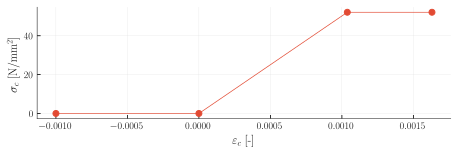

In [26]:
# | label: fig-sigma_epc_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten des Betons"

ax_sigma_eps = conc_linear_no_tension.stress_strain_profile.plot_stress_strain(render=False)

ax_sigma_eps.set_title('')
ax_sigma_eps.set_xlabel('$\\varepsilon_c$ [-]')
ax_sigma_eps.set_ylabel('$\\sigma_c$ [N/mm$^2$]')
plt.show()

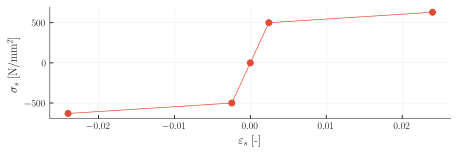

In [27]:
# | label: fig-sigma_eps_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten des Betonstahls"

ax_steel = mat_betonstahl.stress_strain_profile.plot_stress_strain(render = False)

ax_steel.set_title('')
ax_steel.set_xlabel('$\\varepsilon_s$ [-]')
ax_steel.set_ylabel('$\\sigma_s$ [N/mm$^2$]')

plt.show()

Die Spannungs-Dehnungs-Beziehung des Spannstahls wird mit der Vorspannspannung $\sigma_{P\infty}$ reduziert.

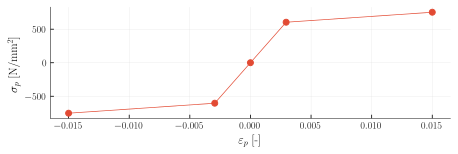

In [28]:
# | label: fig-sigma_eps_vorspannung_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten der Vorspannung"

ax_steel = mat_vorspannung.stress_strain_profile.plot_stress_strain(render = False)

ax_steel.set_title('')
ax_steel.set_xlabel('$\\varepsilon_p$ [-]')
ax_steel.set_ylabel('$\\sigma_p$ [N/mm$^2$]')

plt.show()

In [29]:

points_qs = [
             (200,0),
             (600,0),
             (600, 180),
             (600-90, 180+50),
             (600-90, 180+50+400),
             (800, 180+50+400+30),
             (800, 800),
             (0,800),
             (0,800-140),
             (200 + 90, 800-140-30),
             (200+90, 180+50),
             (200, 180),
            ]


facets_qs = [
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (8,9),
    (9,10),
    (10,11),
    (11,0),
]
control_pts_qs = [(400,200)]

beam = Geometry.from_points(
    points=points_qs,
    facets=facets_qs,
    control_points=control_pts_qs
)

beam.calculate_centroid()


(400.0, 459.4848084544254)

In [30]:
def m_chi_var(z_prestress=700, dA=14, dB=14, dC=12, dD = 12, dE = 12, dF = 12 , dG = 14, dH = 14, dI = 14):

    # Define the section

    s_top_horiz = 90

    bars_A = add_bar_rectangular_array(geometry=beam, 
                            area=dA**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=140+30-60,
                            anchor=(200+90+30,800-30),
                            n=4,
                            )

    bars_B = add_bar_rectangular_array(geometry=bars_A, 
                            area=dB**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=140+30-60,
                            anchor=(200+90+30,800-170+30),
                            n=4,
                            )

    bars_C = add_bar_rectangular_array(geometry=bars_B, 
                            area=dC**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400-60,
                            n_y=2,
                            y_s=140+30-60-30/290 * s_top_horiz,
                            anchor=(200+30,800-170+30/290*s_top_horiz+30),
                            n=4,
                            )

    bars_D = add_bar_rectangular_array(geometry=bars_C, 
                            area=dD**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400+s_top_horiz*2-60,
                            n_y=2,
                            y_s=140+30-60-30/290 * 2*s_top_horiz,
                            anchor=(200-90+30,800-170+30/290*2*s_top_horiz+30),
                            n=4,
                            )

    bars_E = add_bar_rectangular_array(geometry=bars_D, 
                            area=dE**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400+4*s_top_horiz-60,
                            n_y=2,
                            y_s=140+30-60-30/290 * 3*s_top_horiz,
                            anchor=(200-2*s_top_horiz+30,800-170+30/290*3*s_top_horiz+30),
                            n=4,
                            )

    bars_F = add_bar_rectangular_array(geometry=bars_E, 
                            area=dF**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=2,
                            y_s=150,
                            anchor=(200+90+30,400-75),
                            n=4,
                            )

    bars_G = add_bar_rectangular_array(geometry=bars_F, 
                            area=dG**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400-60,
                            n_y=2,
                            y_s=180-60,
                            anchor=(200+30,30),
                            n=4,
                            )

    bars_H = add_bar_rectangular_array(geometry=bars_G, 
                            area=dH**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=150,
                            anchor=(200+90+30,180+10),
                            n=4,
                            )

    bars_I = add_bar_rectangular_array(geometry=bars_H, 
                            area=dI**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=180-60,
                            anchor=(200+90+30,30),
                            n=4,
                            )

    prestress = add_bar_rectangular_array(geometry=bars_I, 
                            area=A_p.magnitude, 
                            material=mat_vorspannung,
                            n_x=1,
                            x_s=0,
                            n_y=1,
                            y_s=0,
                            anchor=(400,z_prestress),
                            n=4,
                            )

    # assign concrete material to first geometry in CompoundGeometry object
    prestress.geoms[0].material = conc_linear_no_tension

    # create ConcreteSection object
    conc_sec = ConcreteSection(prestress)


    # perform moment curvature analysis and store results
    # bending about major axis so theta = pi/2
    moment_curvature_results_pos = conc_sec.moment_curvature_analysis(n=P_infty.to(N).magnitude,
        theta=0, kappa_inc=2.5e-6, progress_bar=False
    )

    moment_curvature_results_neg = conc_sec.moment_curvature_analysis(n=P_infty.to(N).magnitude,
        theta=0, kappa_inc=-2.5e-6, progress_bar=False
    )


    return moment_curvature_results_pos, moment_curvature_results_neg, conc_sec

In [31]:

A_bew_element = np.array([14,14, 10, 10])
B_bew_element = np.array([14,14, 10, 10])
C_bew_element = np.array([12,12, 10, 10])
D_bew_element = np.array([10,10,12,12, 10, 10])
E_bew_element = np.array([10,10,12,12,10, 10])
F_bew_element = np.array([10,10,10, 10])
G_bew_element = np.array([14,14,14, 14])
H_bew_element = np.array([14,14,16, 16])
I_bew_element = np.array([14,14, 16, 16])


# Abstufungen der Bewehrung deren Abstand vom Nullpunkt (links)
x_bew_var_1 = np.array([0,7150,7150, L_tot.magnitude])
x_bew_var_2 = np.array([0,1450, 1450, 6050, 6050, L_tot.magnitude])
x_bew_var_3 = np.array([0,8000, 8000, L_tot.magnitude])
x_bew_var_4 = np.array([0,3400+1500, 3400+1500, L_tot.magnitude])


# interpolate the diameter arrays so there is a value for every x_element
A_bew_element = np.interp(x_element, x_bew_var_1, A_bew_element)
B_bew_element = np.interp(x_element, x_bew_var_1, B_bew_element)
C_bew_element = np.interp(x_element, x_bew_var_1, C_bew_element)
D_bew_element = np.interp(x_element, x_bew_var_2, D_bew_element)
E_bew_element = np.interp(x_element, x_bew_var_2, E_bew_element)
F_bew_element = np.interp(x_element, x_bew_var_3, F_bew_element)
G_bew_element = np.interp(x_element, x_bew_var_4, G_bew_element)
H_bew_element = np.interp(x_element, x_bew_var_4, H_bew_element)
I_bew_element = np.interp(x_element, x_bew_var_4, I_bew_element)



In [32]:
m_chi_list = []
# for i in range(len(x_element)):
for i in range(1):


    if calc ==True:
        m_chi_list.append(m_chi_var(z_p_element[i],
                                    A_bew_element[i],
                                    B_bew_element[i],
                                    C_bew_element[i],
                                    D_bew_element[i],
                                    E_bew_element[i],
                                    F_bew_element[i],
                                    G_bew_element[i],
                                    H_bew_element[i],
                                    I_bew_element[i],
                                    ))

        
    
if calc == True:
    fig3, ax3 = plt.subplots()
    for i, j in enumerate(m_chi_list):

        # MomentenKrümmungsbeziehung als .csv speichern
        m_array = np.concatenate(
            (
                np.flip(j[1].m_x),
                j[0].m_x
            ),axis=0
        )
        chi_array = np.concatenate(
            (
                np.flip(j[1].kappa),
                j[0].kappa
            ),
            axis=0
        )
        tot_array = np.array([m_array/10**6, chi_array*10**3]).transpose()
        np.savetxt(f"docs/T6_m_chi/M_Chi_qs{i}.csv",
                tot_array,
                delimiter = ";"
                )
        
        # Create the plots to control



        attribute_text = f"""$x = {x_element[i]}$ mm 
            \t $z_p = {z_p_element[i]}$ mm 
            \t $\oslash_A = {A_bew_element[i]}$ mm
            \t $\oslash_B = {B_bew_element[i]}$ mm
            \t $\oslash_C = {C_bew_element[i]}$ mm
            \t $\oslash_D = {D_bew_element[i]}$ mm
            \t $\oslash_E = {E_bew_element[i]}$ mm
            \t $\oslash_F = {F_bew_element[i]}$ mm
            \t $\oslash_G = {G_bew_element[i]}$ mm
            \t $\oslash_H = {H_bew_element[i]}$ mm
            \t $\oslash_I = {I_bew_element[i]}$ mm"""



        ax_qs = j[2].plot_section(title='', filename=f'docs/T6_m_chi/qs_{i}.svg')




        fig2, ax = plt.subplots()
        ax.plot(np.array(chi_array)*1000, np.array(m_array)/10**6, color='black')
        ax.set_xlabel('$\chi$ [1/m]')
        ax.set_ylabel('$M_y$ [kNm]')
        ax.text(s=attribute_text, x=np.min(np.array(chi_array)*1000), y=min(np.array(m_array)/10**6)*0.8,fontsize=9,
                verticalalignment='bottom', horizontalalignment='left')
        fig2.savefig(f'docs/T6_m_chi/m_chi_{i}.svg')

        # Überlagerungsplot
        ax3.plot(np.array(chi_array)*1000, np.array(m_array)/10**6, color='lightgray')
        ax3.set_xlabel('$\chi$ [1/m]')
        ax3.set_ylabel('$M_y$ [kNm]')
    fig3.savefig(f'docs/T6_m_chi/m_chi_tot.svg')
    plt.close('all')
                                    

## Schiebungs-Beziehung

## Versuchsresultate

![Verformungsverlauf des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegung_laengs.svg){#fig-durchbiegung_laengs_t6}


![Last-Verformungs-Verhalten des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegungen.svg){#fig-durchbiegung_t6}